In [15]:
%matplotlib inline

In [41]:
import os
import numpy as np
import nibabel as nib
import scipy.stats
from skimage.draw import line
from cmath import rect, phase


In [17]:
import matplotlib.pyplot as plt

In [18]:
img = nib.load('brain.nii')

In [19]:
data = img.get_data()

In [20]:
data.shape

(45, 56, 32, 1)

In [21]:
slice = data[:,28,:,0]

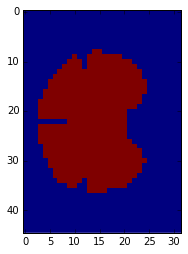

In [133]:
plt.imshow(slice, interpolation='none')

In [27]:
border  = np.zeros_like(slice)
for (i, j), val in np.ndenumerate(slice):
    if i > 0 and i < slice.shape[0] - 1 and j > 0 and j < slice.shape[1] - 1:
        if val == 255:
            if slice[i - 1, j] == 0 \
             or slice[i + 1, j] == 0 \
                or slice[i, j - 1] == 0 \
                or slice[i, j + 1] == 0:
                    border[i, j] = 1
                

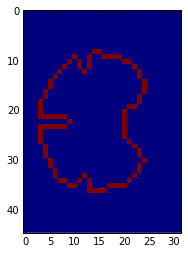

In [55]:
plt.imshow(border, interpolation='none')

In [32]:
idx = np.where(border)
n_idx = idx[0].size

In [187]:
def mean_angle(rad):
    return (phase(sum(rect(1, d) for d in rad)/float(len(rad)))


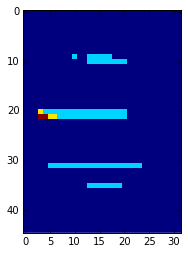

In [210]:
n_particles = 10
density = np.zeros_like(slice)
direction = np.zeros((slice.shape[0], slice.shape[1], n_particles))
direction_new = np.zeros_like(slice, dtype=np.float)

for particle_idx in xrange(n_particles):
    start_voxel_idx = np.random.randint(n_idx)
    start_voxel = np.array([idx[0][start_voxel_idx], idx[1][start_voxel_idx]], dtype=np.int)
    direction_ang = -np.pi/2.#scipy.stats.uniform(-np.pi, np.pi).rvs()
    direction_vector = np.array([np.cos(direction_ang), np.sin(direction_ang)])

    end_voxel = np.array(start_voxel + direction_vector * slice.shape[0] * slice.shape[1], dtype=np.int)
    
    #
    #   simulate particle trajectory
    #
    
    x0, y0, x1, y1 = start_voxel[0], start_voxel[1], end_voxel[0], end_voxel[1]
    
    steep = 0
    x = x0
    y = y0
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)

    if (x1 - x) > 0:
        sx = 1
    else:
        sx = -1
    if (y1 - y) > 0:
        sy = 1
    else:
        sy = -1

    if dy > dx:
        steep = 1
        x, y = y, x
        dx, dy = dy, dx
        sx, sy = sy, sx
    d = (2 * dy) - dx

    rr = -1 * np.ones(int(dx) + 1, dtype=np.intp)
    cc = -1 * np.ones(int(dx) + 1, dtype=np.intp)

    for i in range(dx):
        #print("Step"+ str(i))
        if steep:
            rr[i] = x
            cc[i] = y
        else:
            rr[i] = y
            cc[i] = x
        while d >= 0:
            y = y + sy
            d = d - (2 * dx)
        x = x + sx
        d = d + (2 * dy)
        
        if 0 <= cc[i] < slice.shape[0] and 0 <= rr[i] < slice.shape[1]:
            if slice[cc[i], rr[i]] == 0:
                cc[i] = -1
                rr[i] = -1
                break

    rr[dx] = y1
    cc[dx] = x1
    
    #
    #     plot the trajectory
    #
    
    #rr, cc = line(start_voxel[0], start_voxel[1], end_voxel[0], end_voxel[1])
 
    
    for i in xrange(len(cc)):
        if 0 <= cc[i] < slice.shape[0] and 0 <= rr[i] < slice.shape[1]:
            density[cc[i], rr[i]] += 1.
            direction[cc[i], rr[i], particle_idx] = direction_ang
    #dummy *= slice

                     
for i in range(slice.shape[0]):
    for j in range(slice.shape[1]):
        direction_new[i,j] = mean_angle(direction[i, j, :])
                     
    
                    
plt.imshow(density, interpolation="none")


<matplotlib.colorbar.Colorbar instance at 0x13980ad88>

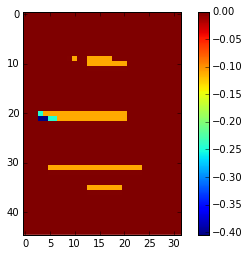

In [211]:
plt.imshow(direction_new, interpolation="none")
plt.colorbar()


In [197]:
mean_angle(direction[8, 14, :])

-0.01506457684338591

In [207]:
mean_angle([-np.pi/2., np.pi/3.
           ])

-0.2617993877991494

In [132]:
slice[17, 4]

255

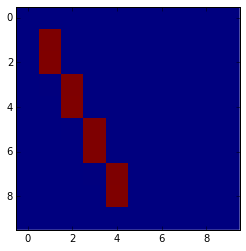

In [54]:
from skimage.draw import line
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc = line(1, 1, 8, 4)
img[rr, cc] =  255
plt.imshow(img, interpolation='none')

In [52]:
np.unique(img)

array([0], dtype=uint8)